**Our Dataset is EV Charging Station Usage. We have 33 features and 259415 instances.**

- **Description of features:**

1. **Station Name**: The name or identifier of the station where Electric Vehicle is charging.

2. **MAC Address**: The Media Access Control (MAC) address of the equipment or device used for the charging. This is a unique identifier for networked devices.

3. **Org Name**: The name of the organization or company associated with the charging station.

4. **Start Date**: The date when the charging is started.

5. **Start Time Zone**: The time zone in which the charging is started.

6. **End Date**: The date when the charging ended.

7. **End Time Zone**: The time zone in which the charging ended.

8. **Transaction Date (Pacific Time)**: The date and time of the transaction in Pacific Time Zone, which might differ from the start and end times.

9. **Total Duration (hh:mm:ss)**: The total duration of the charging time in hours, minutes, and seconds.

10. **Charging Time (hh:mm:ss)**: The actual time the vehicle was connected to the charger, in hours, minutes, and seconds.

11. **Energy (kWh)**: The amount of energy consumed during the charging time, typically measured in kilowatt-hours (kWh).

12. **GHG Savings (kg)**: The amount of greenhouse gas (GHG) emissions saved as a result of using electric vehicle charging compared to a gasoline-powered vehicle, measured in kilograms (kg).

13. **Gasoline Savings (gallons)**: The amount of gasoline saved as a result of using electric vehicle charging, measured in gallons.

14. **Port Type**: The type of charging port used for the EV charging, such as Level 1, Level 2, or DC fast charging.

15. **Port Number**: The specific port or connector number at the charging station where the vehicle was connected.

16. **Plug Type**: The type of plug or connector used by the electric vehicle to connect to the charging station.

17. **EVSE ID**: The Electric Vehicle Supply Equipment (EVSE) ID, a unique identifier for the charging station equipment.

18. **Address 1**: The first line of the address where the charging station is located.

19. **City**: The city where the charging station is located.

20. **State/Province**: The state or province where the charging station is located.

21. **Postal Code**: The postal code or ZIP code of the charging station's location.

22. **Country**: The country where the charging station is located.

23. **Latitude**: The latitude coordinate of the charging station's location.

24. **Longitude**: The longitude coordinate of the charging station's location.

25. **Currency**: The currency used for pricing or fees associated with the charging event.

26. **Fee**: The fee charged for the charging service, if applicable.

27. **Ended By**: The entity or person who ended the charging session.

28. **Plug In Event Id**: An identifier for the specific plug-in event.

29. **Driver Postal Code**: The postal code of the driver's location.

30. **User ID**: An identifier for the user or driver of the electric vehicle.

31. **County**: The county where the charging station is located.

32. **System S/N**: The serial number of the charging system or equipment.

33. **Model Number**: The model number of the charging equipment or station.

Imported Libraries used for plotting, EDA, preprocessing etc.

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/EVChargingStationUsage.csv')
df.head()

<ipython-input-6-953e84ca2f84>:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/EVChargingStationUsage.csv')


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


The features in dataset are:

In [15]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

Checking for the null values in the dataset

In [16]:
df.isnull().sum()

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency        

## 1. Preprocessing and Cleaning

In [17]:
df.drop(columns=['Org Name', 'Transaction Date (Pacific Time)', 'City', 'State/Province', 'Country', 'Ended By', 'Plug In Event Id', 'County', 'Driver Postal Code', 'System S/N'], inplace=True)

In [19]:
df.shape

(259415, 23)

In [20]:
df['Model Number'].fillna(0, inplace=True)
df['EVSE ID'].fillna(0, inplace=True)

Here we have dropped instances with NaN values in it.

In [21]:
df = df.dropna()

It creates new column Total Duration (hh:mm:ss) in the Dataframe to Pandas Dataframe Data type. Similarly Total Duration (seconds) column in created.

In [22]:
df['Total Duration (hh:mm:ss)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)'])
df['Total Duration (seconds)'] = df['Total Duration (hh:mm:ss)'].dt.total_seconds()
df.drop(columns=['Total Duration (hh:mm:ss)'], inplace=True)

<ipython-input-22-d03038dabc6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Duration (hh:mm:ss)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)'])
<ipython-input-22-d03038dabc6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Duration (seconds)'] = df['Total Duration (hh:mm:ss)'].dt.total_seconds()
<ipython-input-22-d03038dabc6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

It creates Charging Time (hh:mm:ss) and Charging Time(seconds) column into Pandas Timedelta Data Type.

In [23]:
df['Charging Time (hh:mm:ss)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)'])
df['Charging Time (seconds)'] = df['Charging Time (hh:mm:ss)'].dt.total_seconds()
df.drop(columns=['Charging Time (hh:mm:ss)'], inplace=True)

<ipython-input-23-567baa34b7dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Charging Time (hh:mm:ss)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)'])
<ipython-input-23-567baa34b7dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Charging Time (seconds)'] = df['Charging Time (hh:mm:ss)'].dt.total_seconds()
<ipython-input-23-567baa34b7dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

It converts values in the features into Pandas DataType.

In [24]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y %H:%M')
df['Start Time'] = df['Start Date'].dt.strftime('%H:%M')
df['End Date'] = pd.to_datetime(df['End Date'], format='%m/%d/%Y %H:%M',errors='coerce')
df['End Time'] = df['End Date'].dt.strftime('%H:%M')

<ipython-input-24-eedb1c89ad76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Date'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y %H:%M')
<ipython-input-24-eedb1c89ad76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Time'] = df['Start Date'].dt.strftime('%H:%M')
<ipython-input-24-eedb1c89ad76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

We have imported preprocessing module from sklearn and it maps the unique station names to integer values. These mappings are stored using LabelEncoder.

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(list(df['Station Name']))
df['Station_cat'] = df['Station Name'].apply(lambda x: le.transform([x])[0]+1)

<ipython-input-25-fda5bd233e23>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Station_cat'] = df['Station Name'].apply(lambda x: le.transform([x])[0]+1)


In [26]:
le.fit(list(df['Plug Type']))
df['Plug Type_cat'] = df['Plug Type'].apply(lambda x: le.transform([x])[0]+1)

<ipython-input-26-9661733dc3e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plug Type_cat'] = df['Plug Type'].apply(lambda x: le.transform([x])[0]+1)


In [27]:
le.fit(list(df['Port Type']))
df['Port Type_cat'] = df['Port Type'].apply(lambda x: le.transform([x])[0]+1)

<ipython-input-27-8f00cea835f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Port Type_cat'] = df['Port Type'].apply(lambda x: le.transform([x])[0]+1)


## 2. EDA

#### Number of Stations at a given Address

In [28]:
dist = df.groupby("Address 1")["Station Name"].nunique().reset_index()
dist.rename(columns={"Station Name": "Number of Stations"}, inplace=True)
dist

,Address 1,Number of Stations
0,1213 Newell Rd,3
1,1514 Walnut Dr,1
2,1520 Walnut Dr,2
3,250 Hamilton Ave,2
4,275 Cambridge Ave,4
5,350 Sherman Ave,11
6,358 Sherman Ave,2
7,3700 Middlefield Rd,6
8,400 Cambridge Ave,2
9,445 Bryant St,7


In [29]:
df.isnull().sum()

Station Name                   0
MAC Address                    0
Start Date                     0
Start Time Zone                0
End Date                      38
End Time Zone                  0
Energy (kWh)                   0
GHG Savings (kg)               0
Gasoline Savings (gallons)     0
Port Type                      0
Port Number                    0
Plug Type                      0
EVSE ID                        0
Address 1                      0
Postal Code                    0
Latitude                       0
Longitude                      0
Currency                       0
Fee                            0
User ID                        0
Model Number                   0
Total Duration (seconds)       0
Charging Time (seconds)        0
Start Time                     0
End Time                      38
Station_cat                    0
Plug Type_cat                  0
Port Type_cat                  0
dtype: int64

#### Boxplot

We have plotted boxplots for Total Duration (seconds), Charging Time (seconds) and Energy (kWh). We can only plot boxplots of features whose values are in numeric form. In the boxplot, we can observe the outliers and can remove them.

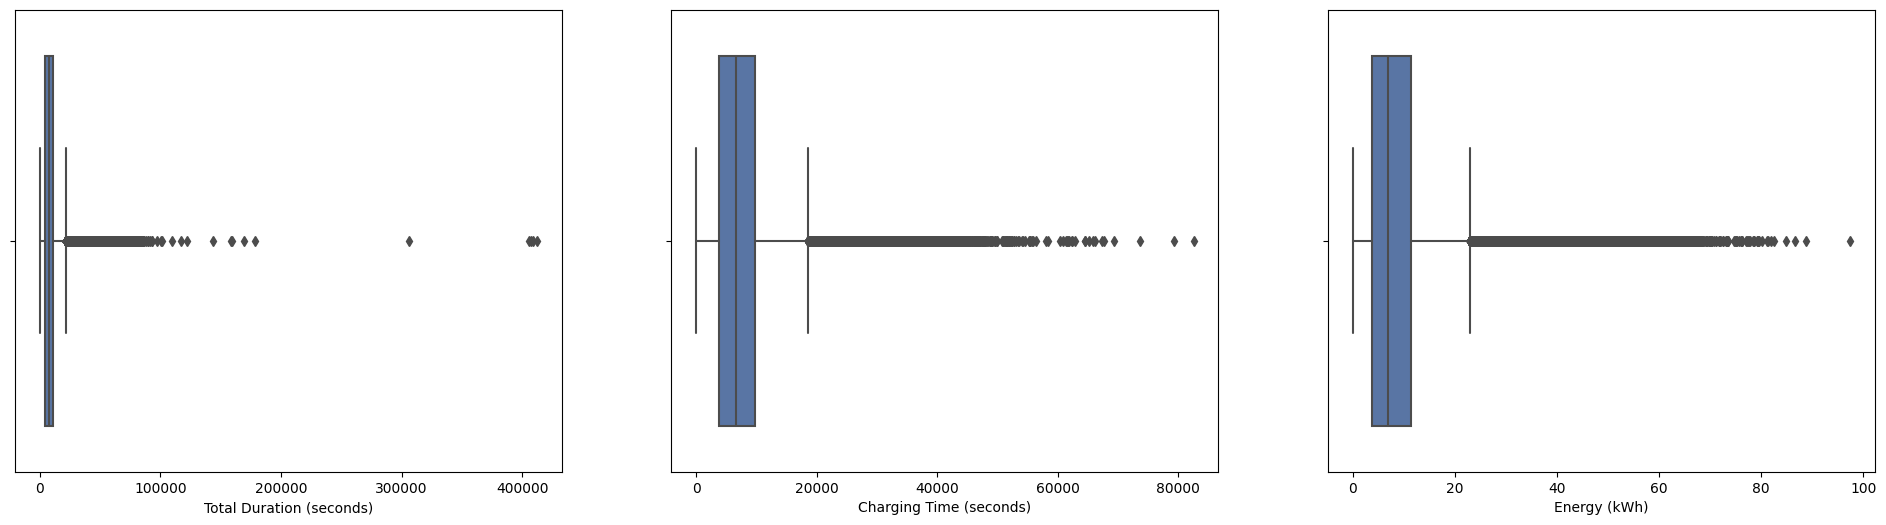

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Total Duration (seconds)", "Charging Time (seconds)", "Energy (kWh)"]):
    sns.boxplot(x=df[col], ax=ax[axid])

We have plotted boxplots for GHG Savings (kg), Gasoline Savings(gallons) and Fee.

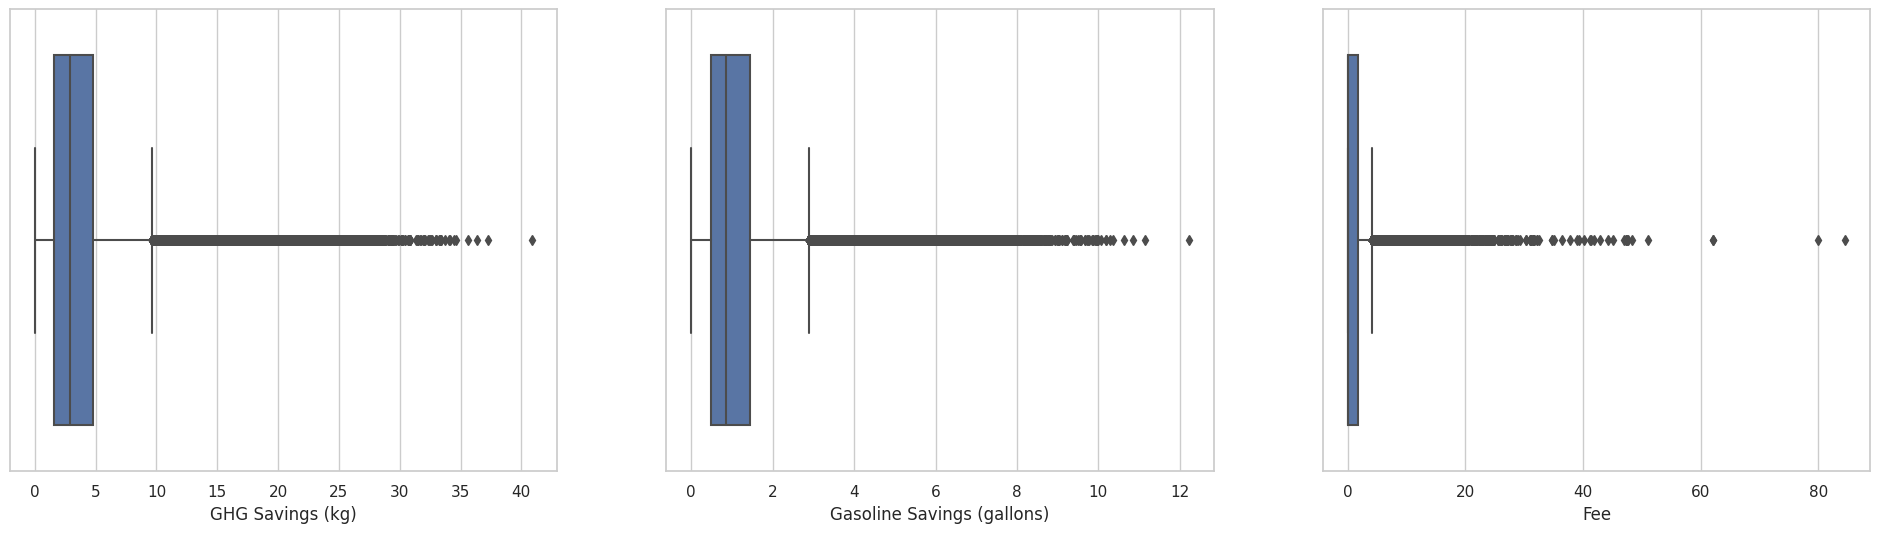

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["GHG Savings (kg)", "Gasoline Savings (gallons)", "Fee"]):
    sns.boxplot(x=df[col], ax=ax[axid])

#### Pie charts

For those features which do not have values in the numeric form, we can analyze the data using Pie Charts instead of Box Plots.

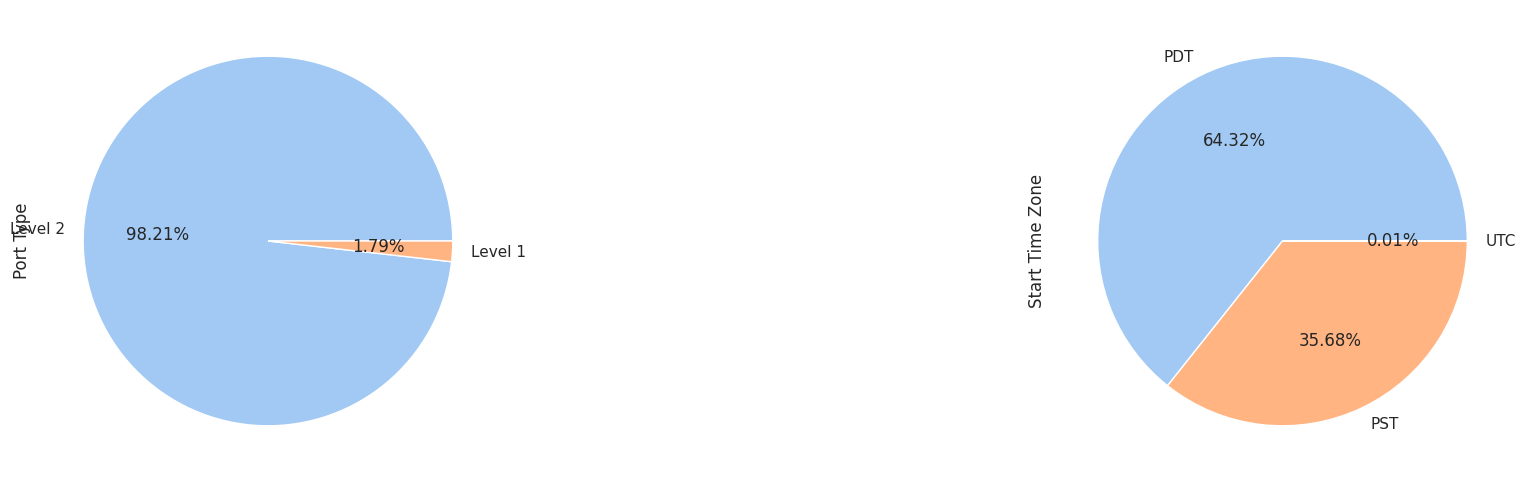

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

for axid, col in enumerate(["Port Type","Start Time Zone"]):
    col_dist = df[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

#### Count plot

Plotted the frequency of the Fee.

<ipython-input-33-0491917513cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fees"]=df["Fee"].round()


<Axes: xlabel='Fees', ylabel='count'>

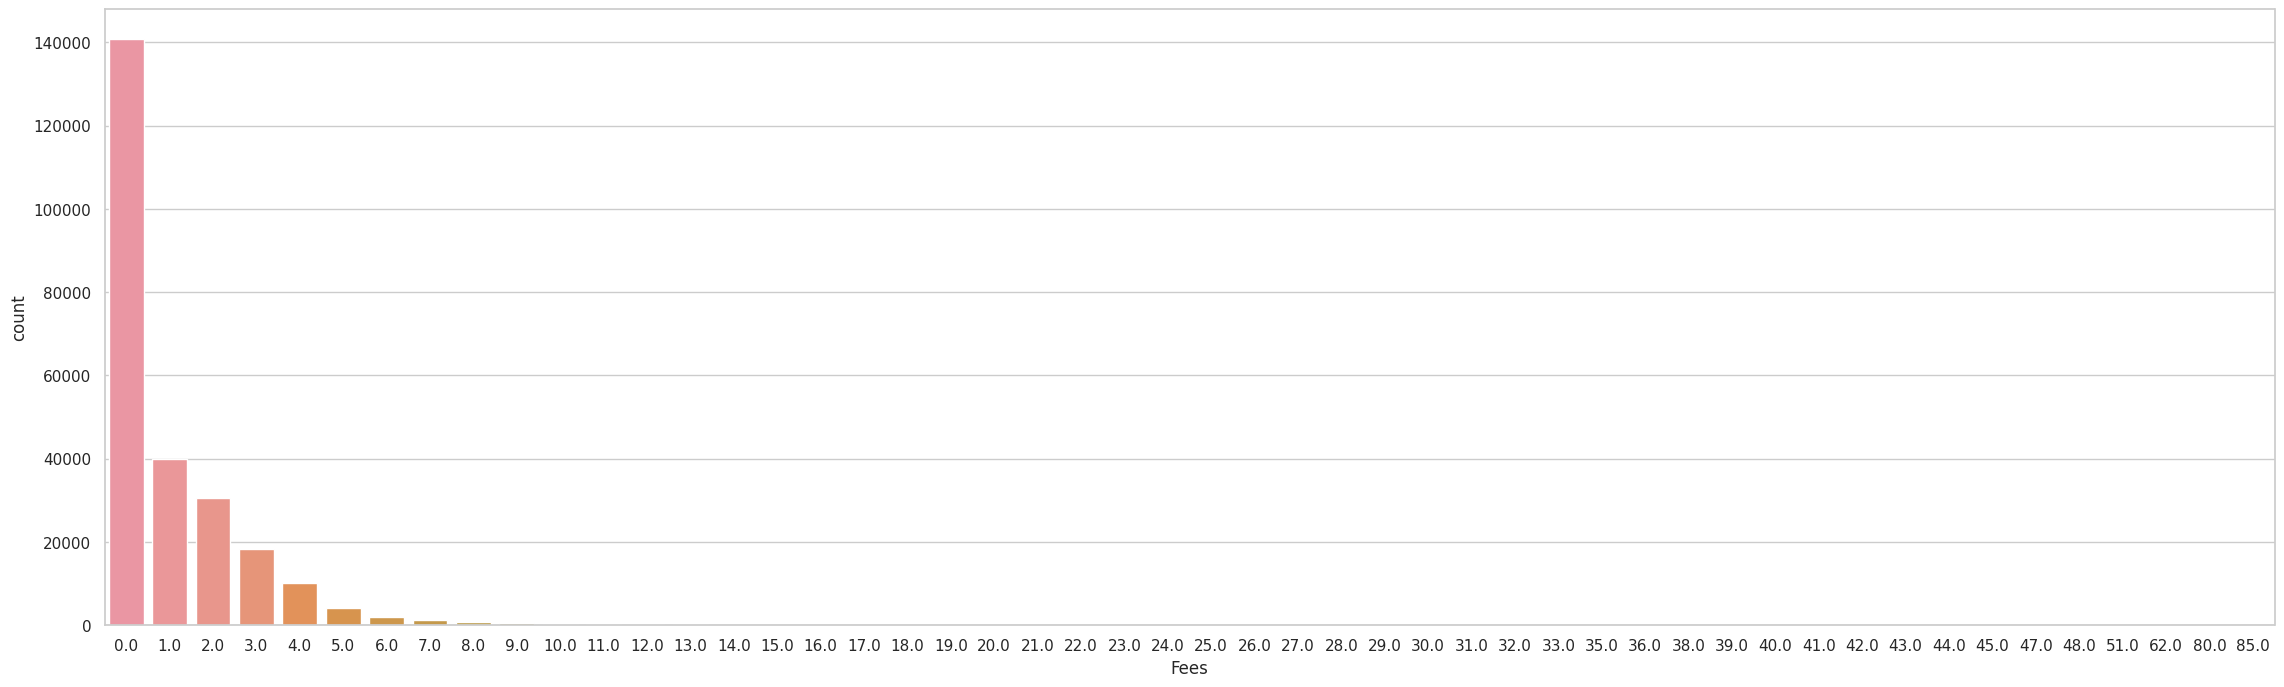

In [33]:
df["Fees"]=df["Fee"].round()
plt.figure(figsize=(28, 8))
sns.countplot(x="Fees",data=df)

Plotted the frequency plot of Plug Type. From this we can see that 91% of Plug type are J1772 and only 9% are NEMA 5-20R.

<Axes: xlabel='Plug Type', ylabel='count'>

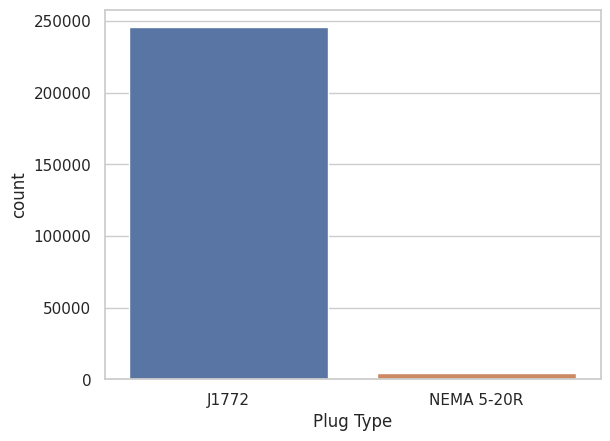

In [34]:
sns.countplot(x="Plug Type",data=df)

#### Date vs Count plots

In [35]:
df["Start Date"] = pd.to_datetime(df["Start Date"])

<ipython-input-35-6d48763e5fd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Start Date"] = pd.to_datetime(df["Start Date"])


In [36]:
df['Start Date (Date)'] = pd.to_datetime(df['Start Date']).dt.date
df['Start Date (Time)'] = pd.to_datetime(df['Start Date']).dt.time

<ipython-input-36-24cd7a6c5ab5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Date (Date)'] = pd.to_datetime(df['Start Date']).dt.date
<ipython-input-36-24cd7a6c5ab5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Date (Time)'] = pd.to_datetime(df['Start Date']).dt.time


In [37]:
df[["Start Date", "Start Date (Date)", "Start Date (Time)"]]

,Start Date,Start Date (Date),Start Date (Time)
0,2011-07-29 20:17:00,2011-07-29,20:17:00
1,2011-07-30 00:00:00,2011-07-30,00:00:00
2,2011-07-30 08:16:00,2011-07-30,08:16:00
3,2011-07-30 14:51:00,2011-07-30,14:51:00
4,2011-07-30 18:51:00,2011-07-30,18:51:00
...,...,...,...
259410,2020-12-31 16:39:00,2020-12-31,16:39:00
259411,2020-12-31 16:48:00,2020-12-31,16:48:00
259412,2020-12-31 17:28:00,2020-12-31,17:28:00
259413,2020-12-31 17:49:00,2020-12-31,17:49:00


This code plots the visualization of Date vs Count for each year from 2011-2020.

<ipython-input-38-5e740bff21e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Start Date (Year)"] = df["Start Date (Date)"].apply(lambda x: x.year)


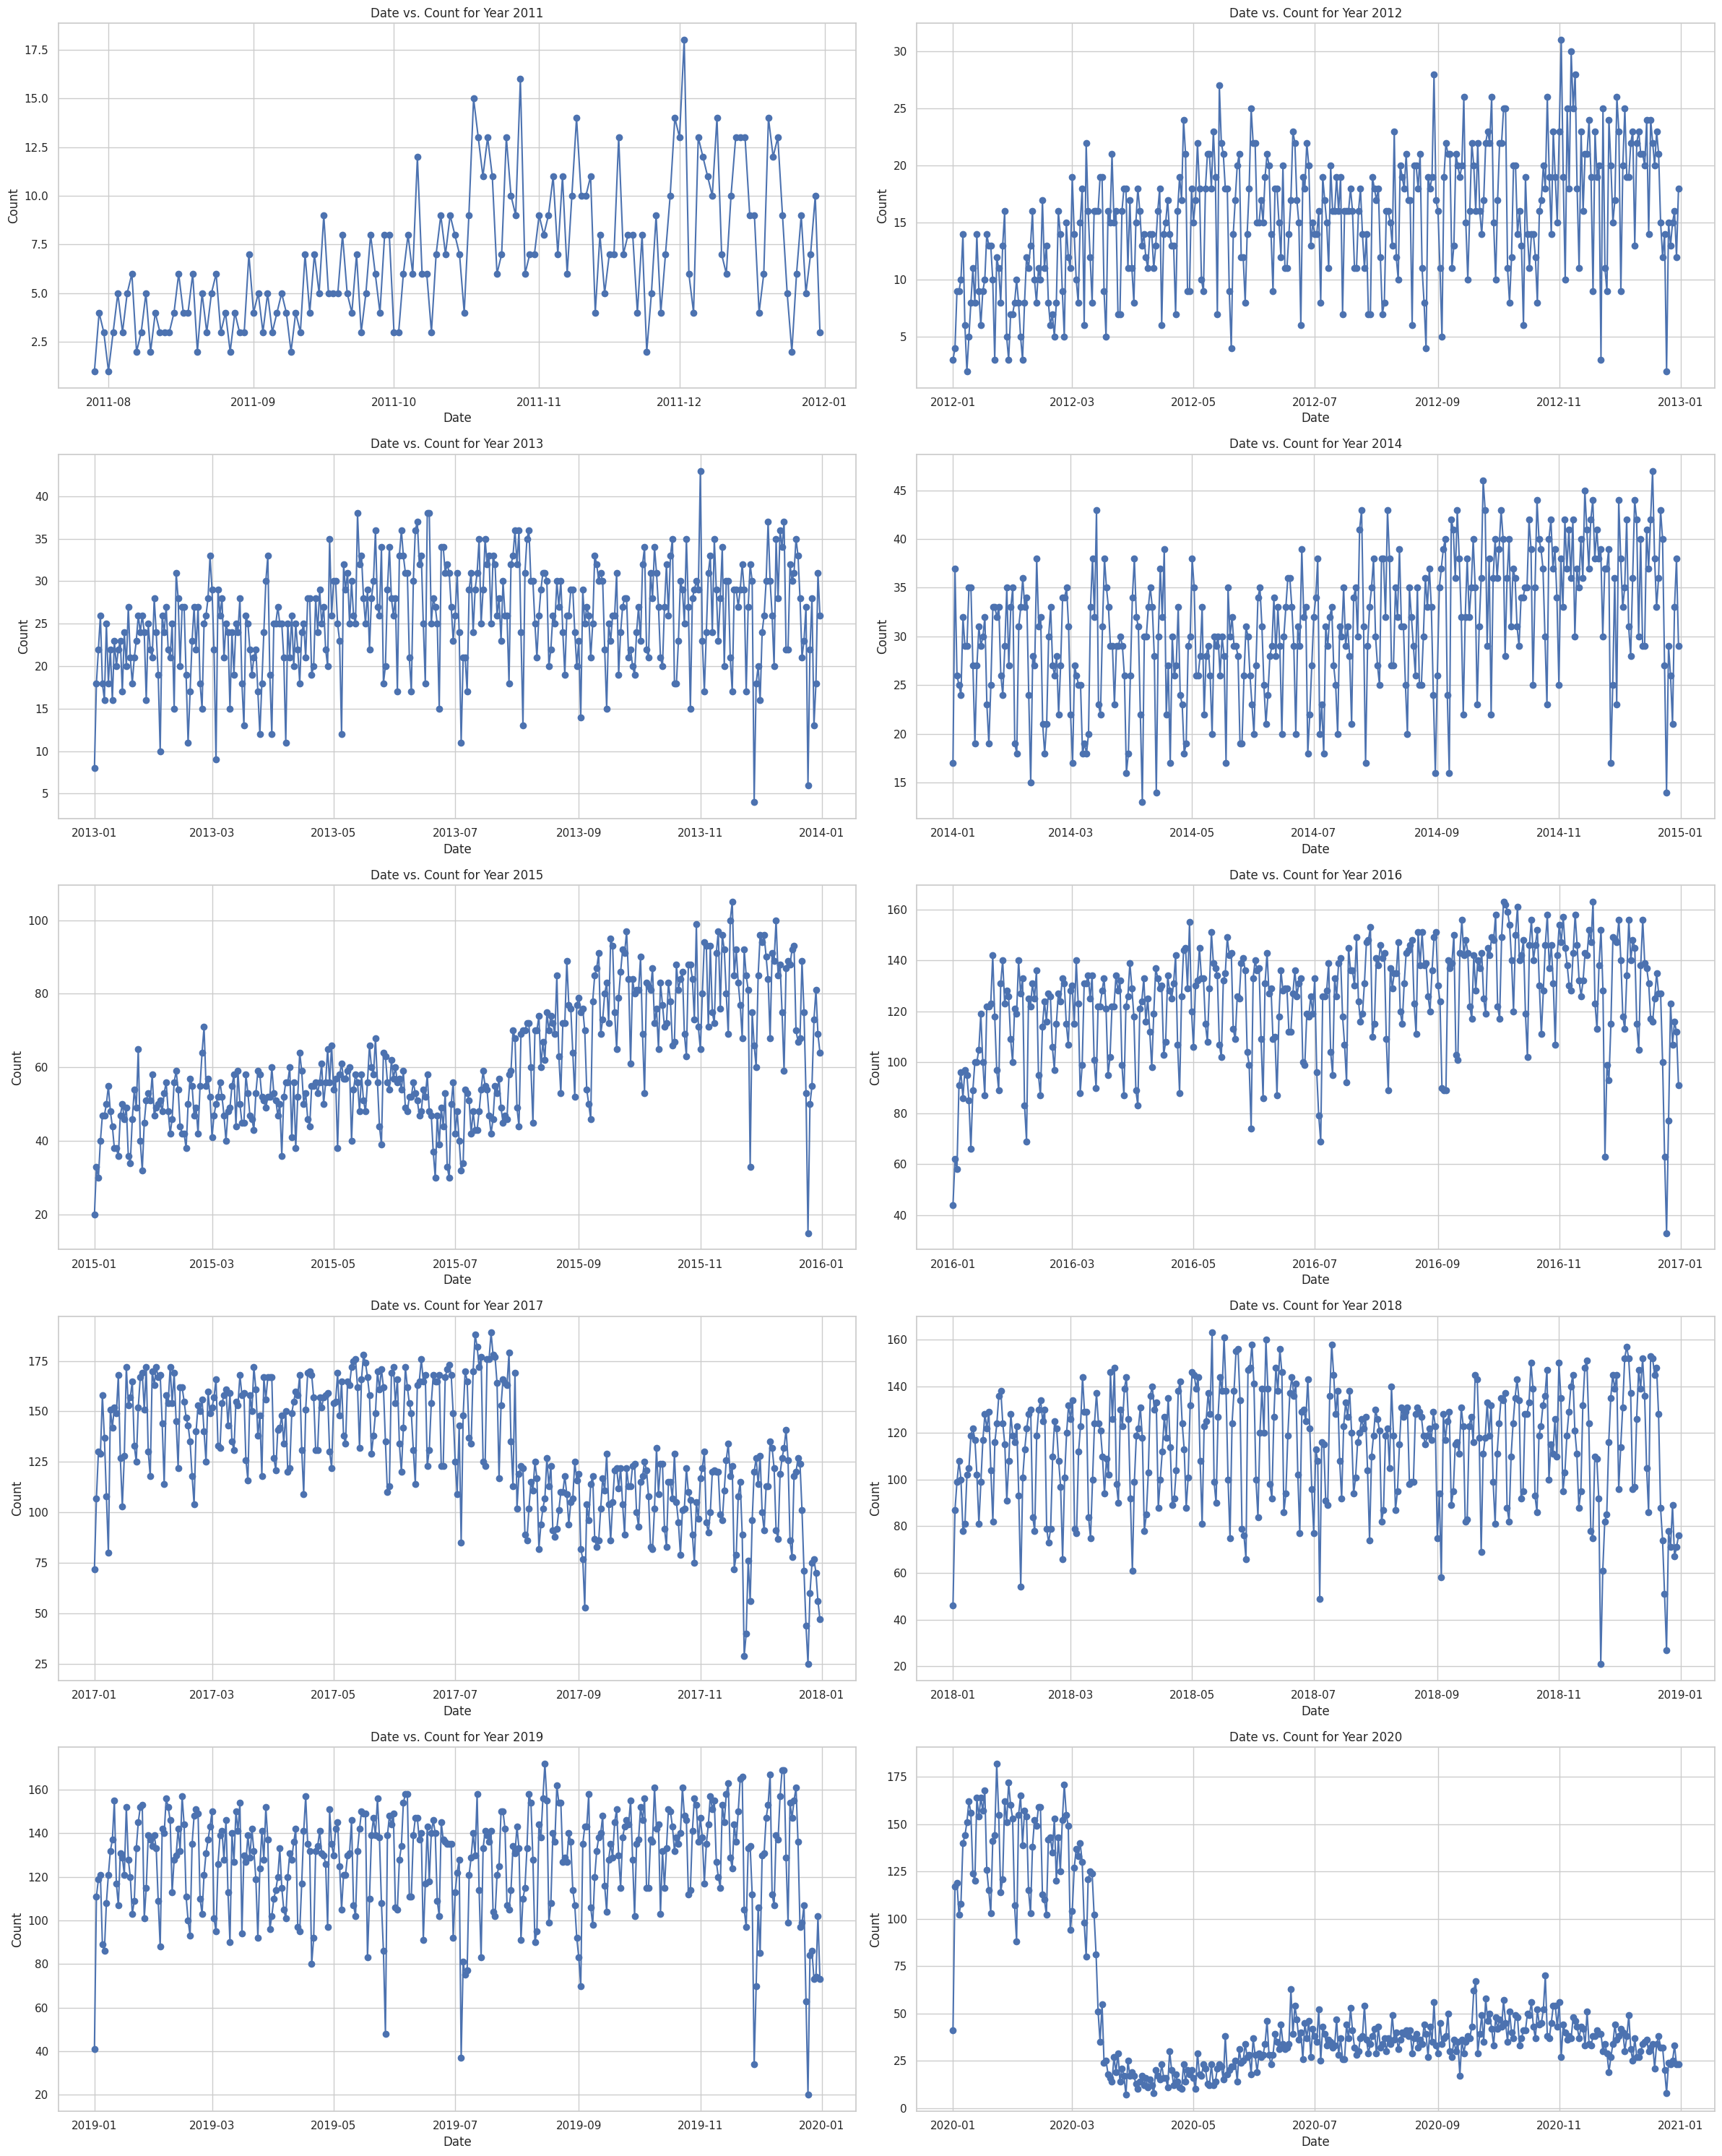

In [38]:
df["Start Date (Year)"] = df["Start Date (Date)"].apply(lambda x: x.year)
unique_years = df['Start Date (Year)'].unique()

fig, axes = plt.subplots(5, 2, figsize=(24, 30))

for i, year in enumerate(unique_years):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    year_data = df[df["Start Date (Year)"] == year]
    date_counts = year_data.groupby('Start Date (Date)').size().reset_index(name='Count')

    ax.plot(date_counts['Start Date (Date)'], date_counts['Count'], marker='o', linestyle='-')
    ax.set_title(f'Date vs. Count for Year {year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.grid(True)
    ax.tick_params(axis='x')

plt.tight_layout()
plt.show()

This is the scatter plot of Charging Time (seconds) vs Fee on Postal Code, Plug Type and Port Type.

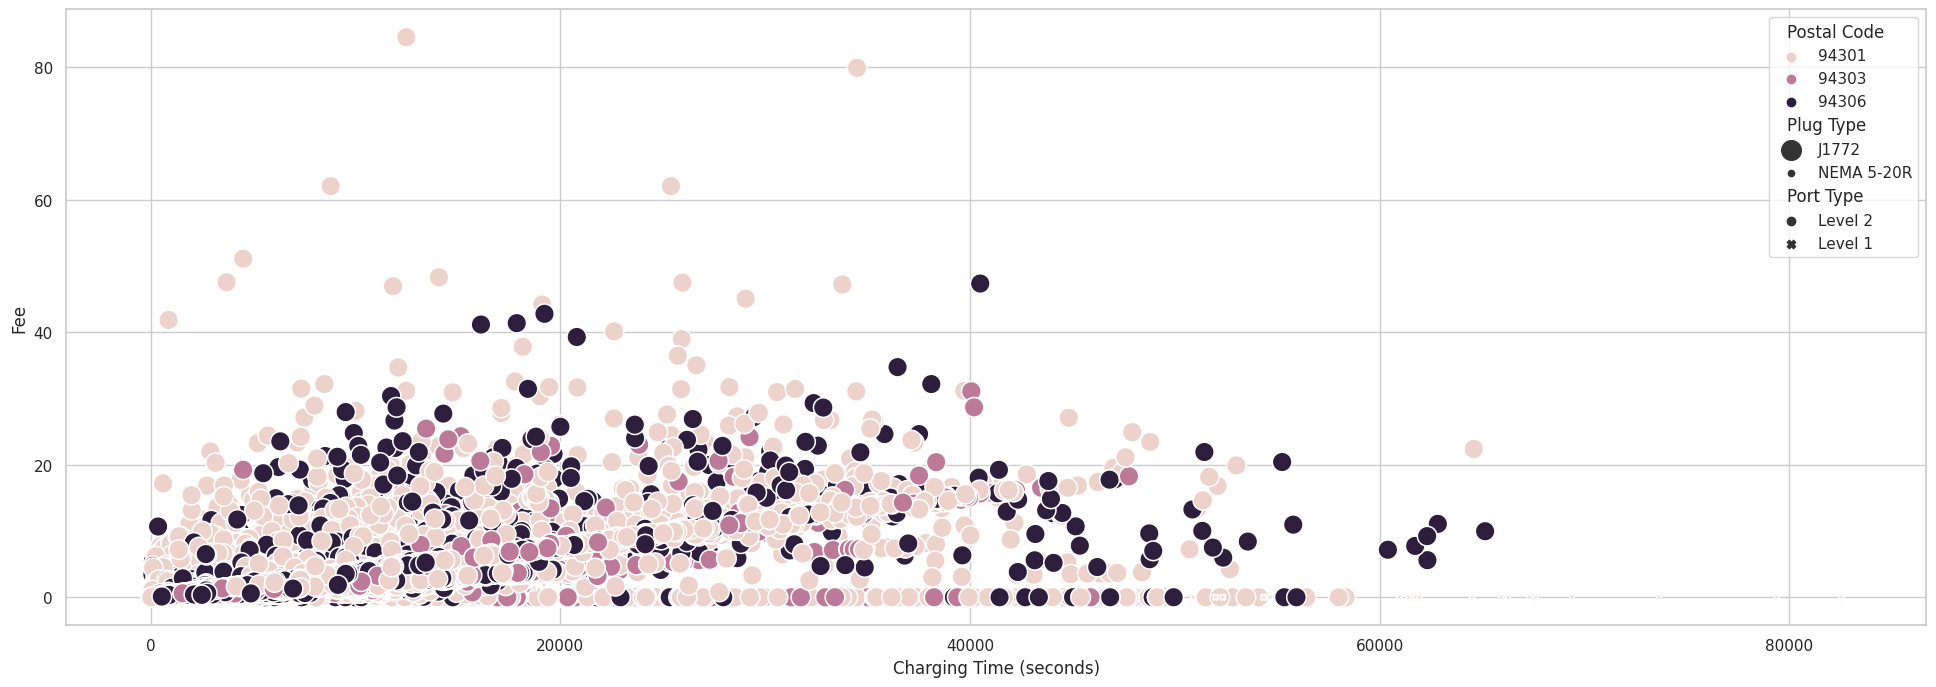

In [39]:
plt.figure(figsize=(24,8))
ax = sns.scatterplot(x=df["Charging Time (seconds)"], y=df["Fee"], hue=df["Postal Code"], size=df["Plug Type"], style=df["Port Type"], sizes=(20, 200), legend="full")

We can see from above that at charging stations which are located 94301 postal code has less duration than 94303 and 94306.
And mostly J1772 plug type is used

Scatter Plot of Fee vs Energy (kWh)

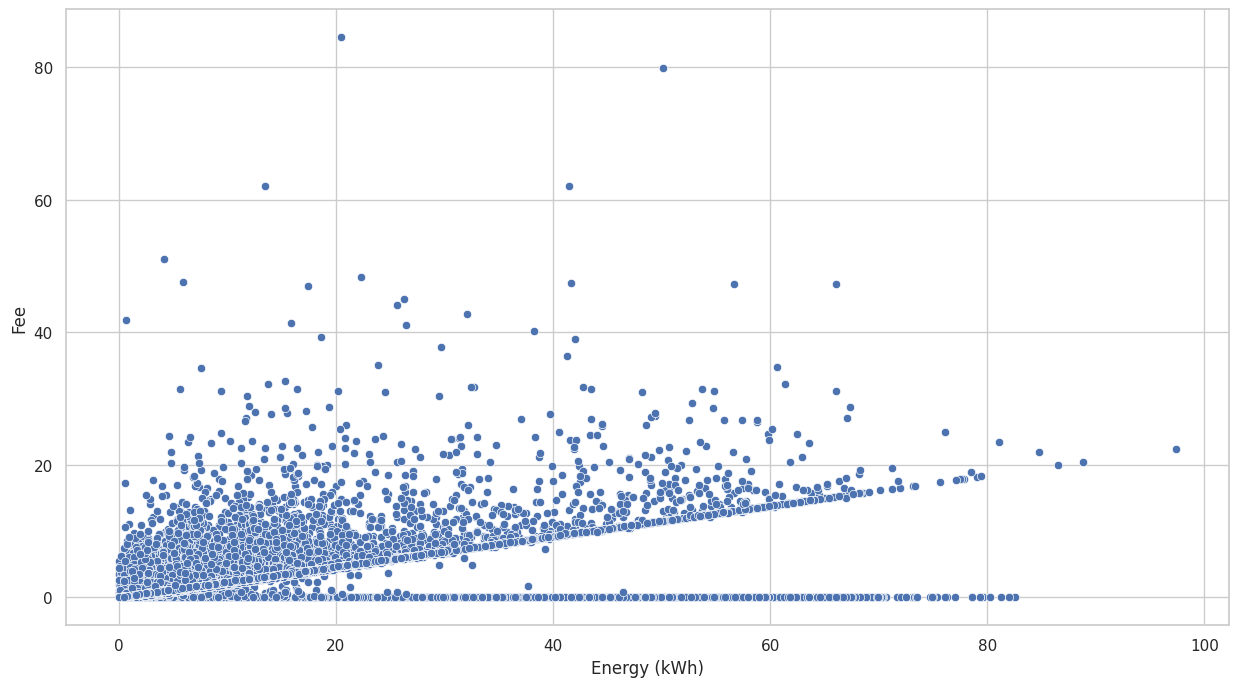

In [40]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(y=df["Fee"], x=df["Energy (kWh)"])

Scatter Plot of Energy (kWh) vs Charging Time (seconds)

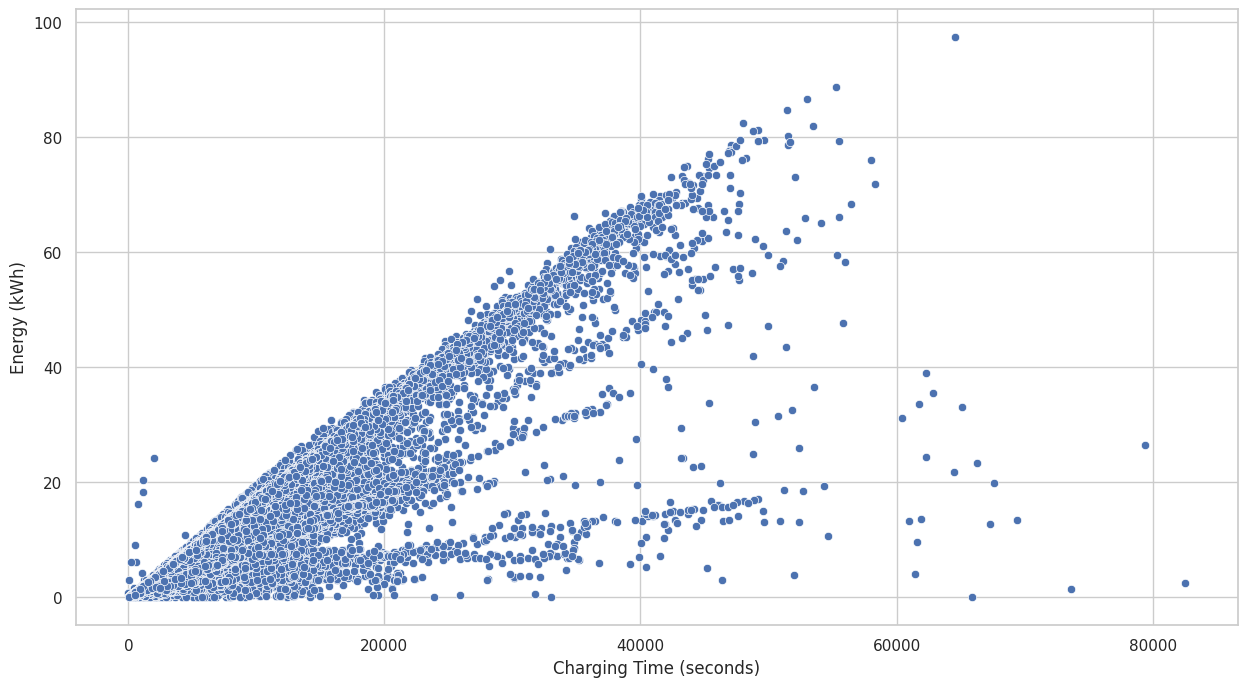

In [41]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["Charging Time (seconds)"], y=df["Energy (kWh)"])

In [42]:
df['Charging Time (hours)'] = df['Charging Time (seconds)'] / 3600
df_cnt_h=df['Charging Time (hours)'].value_counts()
df_cnt_h

<ipython-input-42-b6473116f348>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Charging Time (hours)'] = df['Charging Time (seconds)'] / 3600


1.415278     73
1.445833     71
1.426389     67
2.222222     66
2.068056     66
             ..
11.112222     1
6.214167      1
4.553611      1
13.334722     1
6.067778      1
Name: Charging Time (hours), Length: 22168, dtype: int64

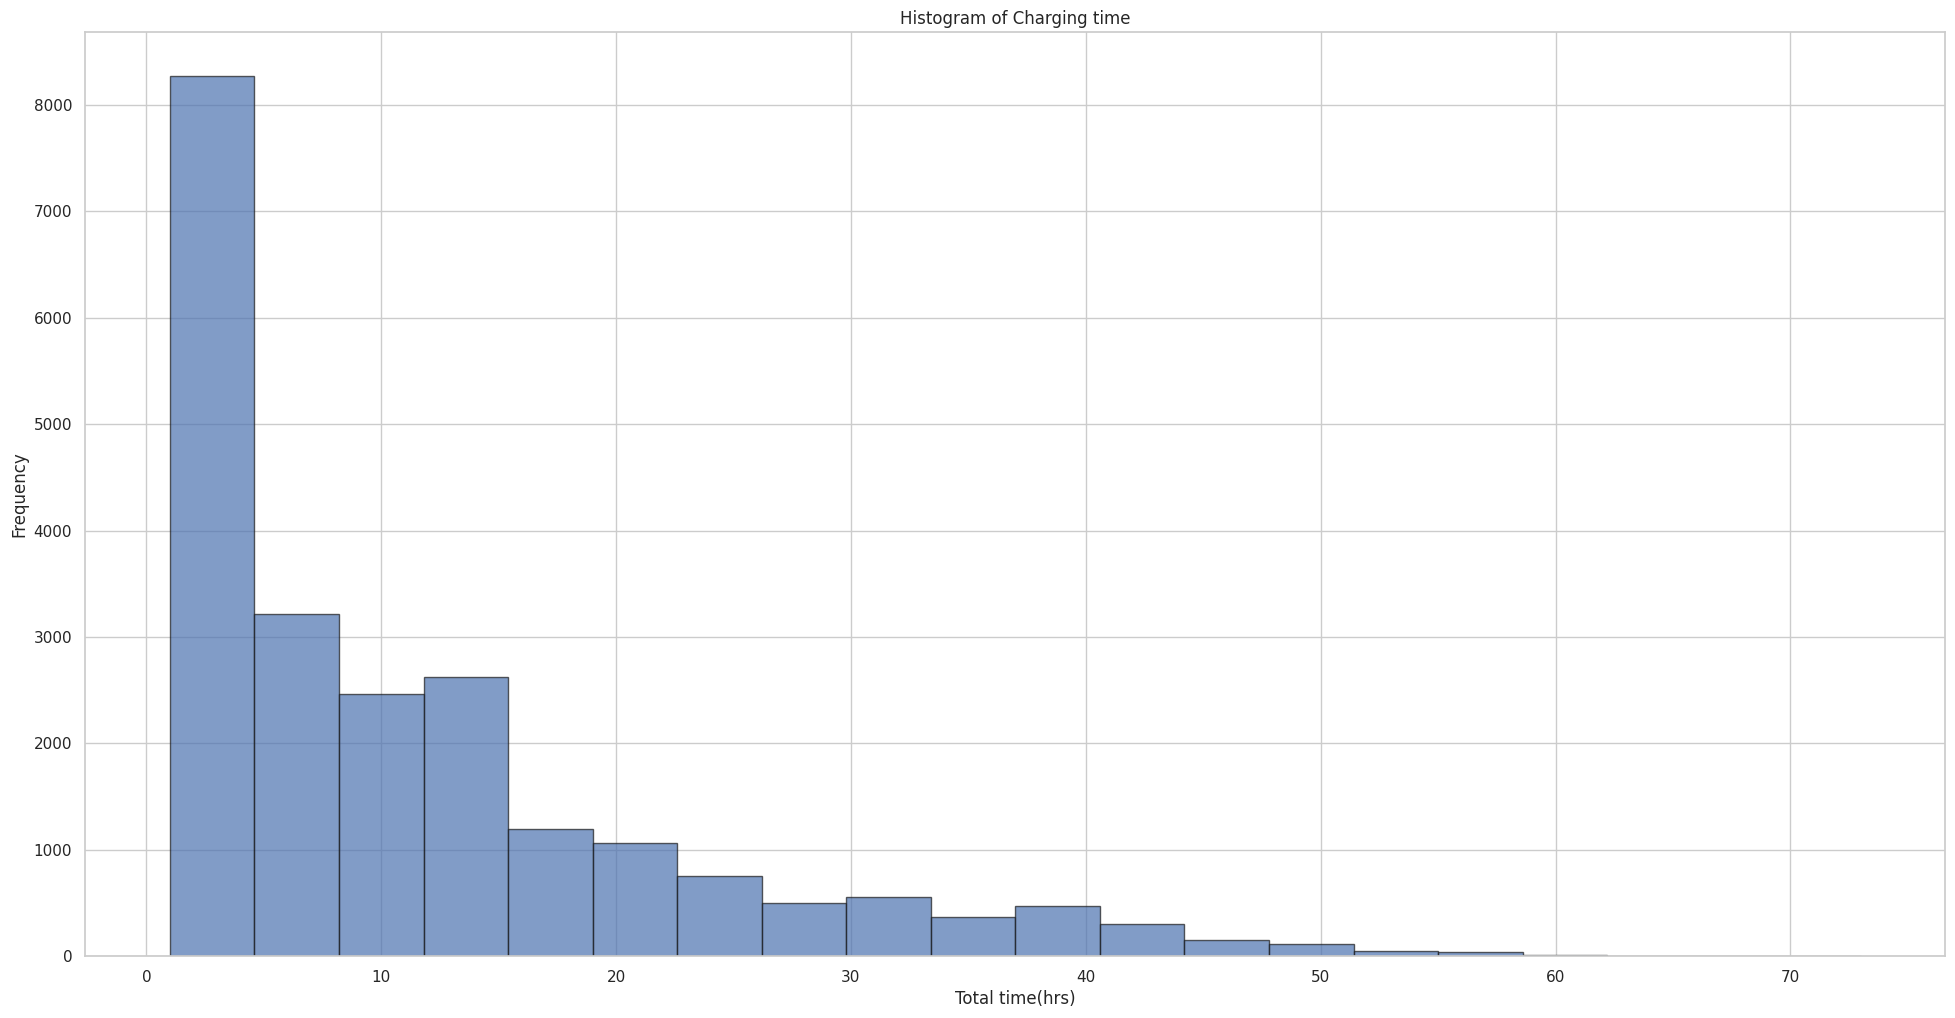

In [43]:
plt.figure(figsize=(24,12))
plt.hist(df_cnt_h, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Total time(hrs)')
plt.ylabel('Frequency')
plt.title('Histogram of Charging time')
plt.show()

Grouping the data by Latitude and Longitude by count and projecting it in 3D plot with parameters Latitude, Longitude and count.

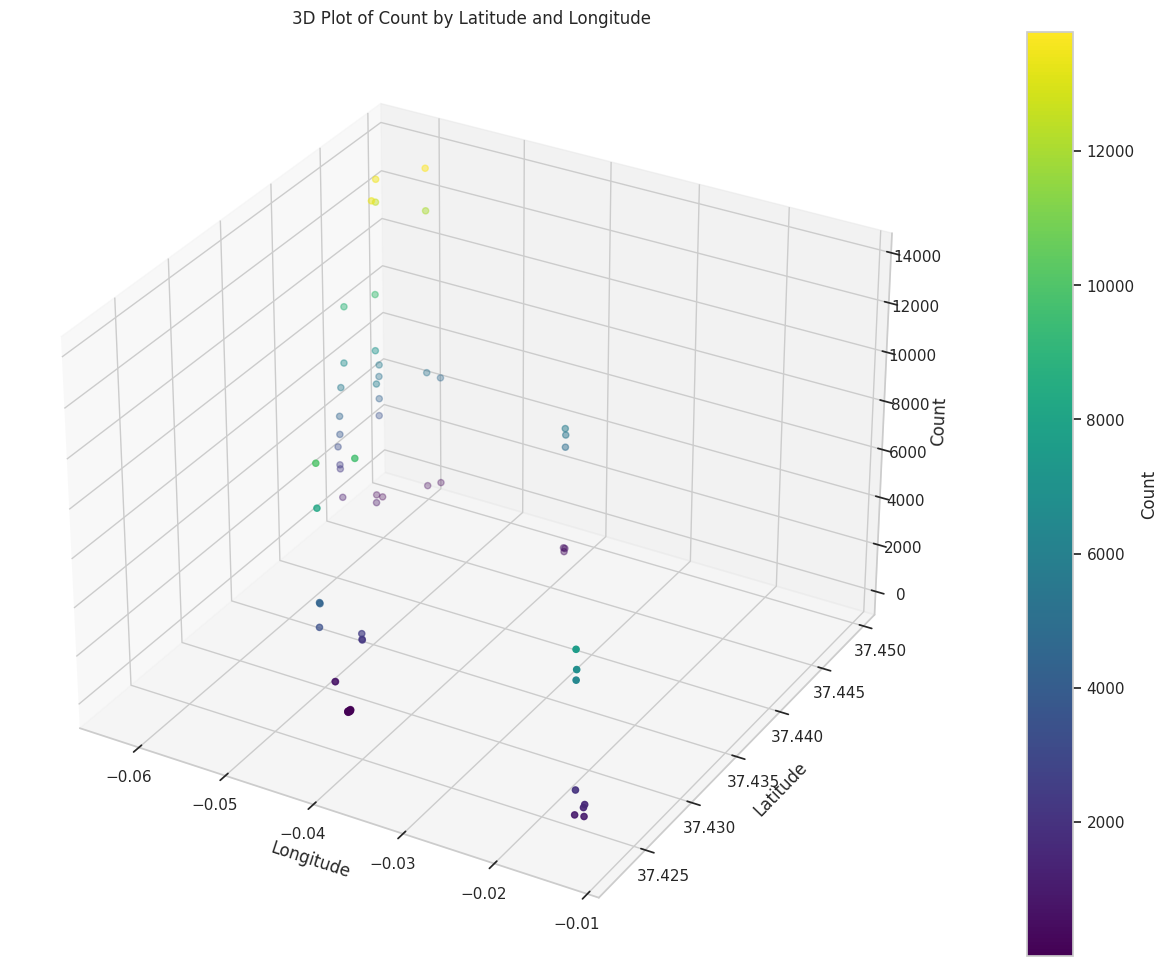

In [44]:
grouped = df.groupby(['Latitude', 'Longitude']).size().reset_index(name = 'Count')

fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(grouped['Longitude'], grouped['Latitude'], grouped['Count'], c=grouped['Count'], cmap='viridis')


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Count')
plt.title('3D Plot of Count by Latitude and Longitude')

cbar = plt.colorbar(scatter)
cbar.set_label('Count')

plt.show()

Here we are defining the function to convert the time from string to hours. We have created an numpy array of 24 for hours and adjusting the step size as needed. Calculated the busyness and plotted the Busyness vs Tinme(hours).

<ipython-input-45-36042f760745>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Time'] = df['Start Time'].astype(str)
<ipython-input-45-36042f760745>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End Time'] = df['End Time'].astype(str)
<ipython-input-45-36042f760745>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

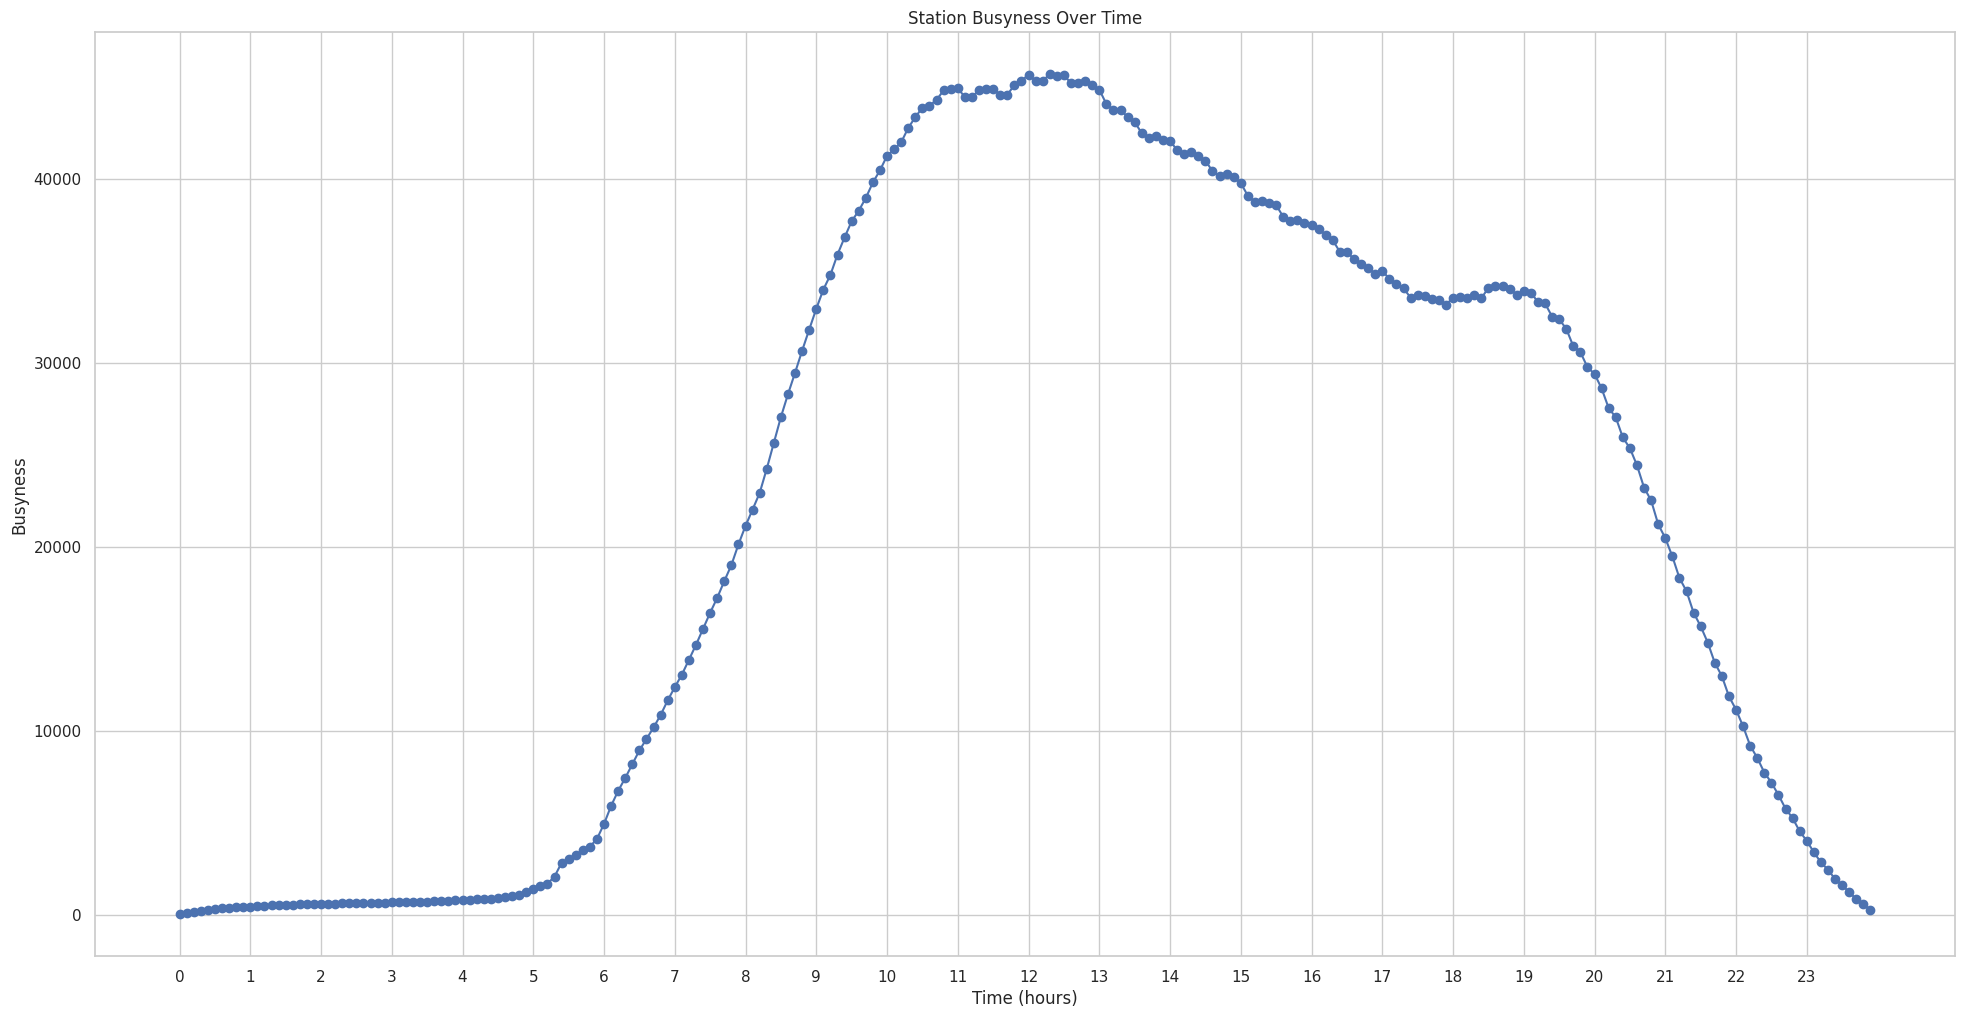

In [45]:
df['Start Time'] = df['Start Time'].astype(str)
df['End Time'] = df['End Time'].astype(str)
def time_to_hours(time_str):
    if pd.notna(time_str) and ':' in time_str:
        hours, minutes = map(int, time_str.split(':'))
        return hours + minutes / 60
    else:
        return np.nan

df['Start Hour'] = df['Start Time'].apply(time_to_hours)
df['End Hour'] = df['End Time'].apply(time_to_hours)

timeline = np.arange(0, 24, 0.1)

busyness = []
for hour in timeline:
    active_uses = ((df['Start Hour'] <= hour) & (df['End Hour'] >= hour)).sum()
    busyness.append(active_uses)

plt.figure(figsize=(24, 12))
plt.plot(timeline, busyness, marker='o', linestyle='-', color='b')
plt.xlabel('Time (hours)')
plt.ylabel('Busyness')
plt.title('Station Busyness Over Time')
plt.grid(True)
plt.xticks(np.arange(0, 24, 1))
plt.show()

#### Heatmap

Here by plotting the heatmap we can get the correlation values between the parameters.

<Axes: >

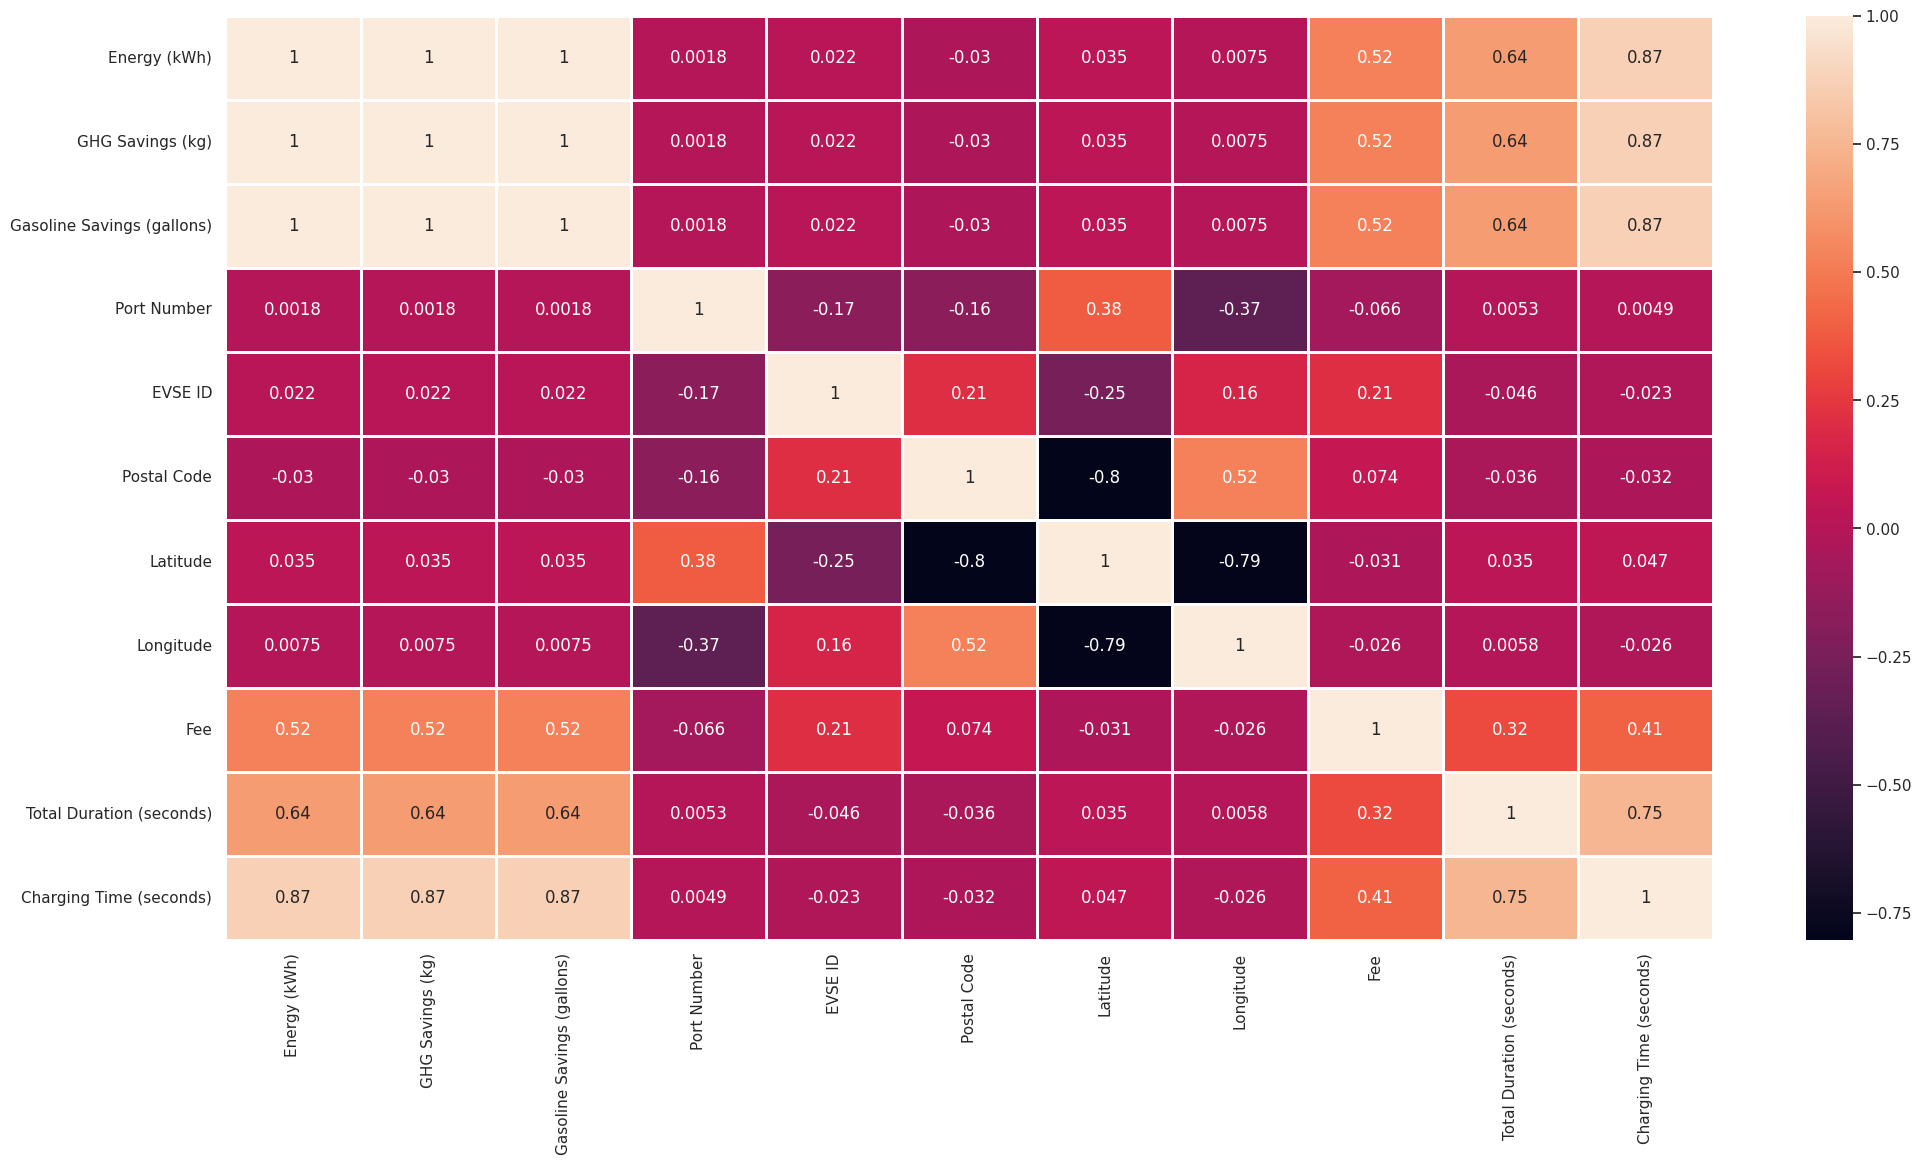

In [58]:
new_df = df[['Energy (kWh)', 'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Number', 'EVSE ID', 'Postal Code', 'Latitude', 'Longitude', 'Fee', 'Total Duration (seconds)', 'Charging Time (seconds)']]
plt.figure(figsize=(24,12))
sns.heatmap(data=new_df.corr(), lw = 1, annot=True)

In [47]:
new_df.corr()

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Total Duration (seconds),Charging Time (seconds)
Energy (kWh),1.000000,1.000000,1.000000,0.001768,0.021617,-0.030004,0.034793,0.007525,0.521934,0.640313,0.869953
GHG Savings (kg),1.000000,1.000000,1.000000,0.001768,0.021617,-0.030004,0.034793,0.007526,0.521935,0.640313,0.869953
Gasoline Savings (gallons),1.000000,1.000000,1.000000,0.001768,0.021617,-0.030003,0.034792,0.007526,0.521934,0.640313,0.869954
Port Number,0.001768,0.001768,0.001768,1.000000,-0.173130,-0.161440,0.381161,-0.365039,-0.066009,0.005291,0.004902
EVSE ID,0.021617,0.021617,0.021617,-0.173130,1.000000,0.211446,-0.253695,0.162361,0.208513,-0.045928,-0.023124
Postal Code,-0.030004,-0.030004,-0.030003,-0.161440,0.211446,1.000000,-0.801888,0.522071,0.074415,-0.036088,-0.032153
Latitude,0.034793,0.034793,0.034792,0.381161,-0.253695,-0.801888,1.000000,-0.793875,-0.031035,0.034898,0.047479
Longitude,0.007525,0.007526,0.007526,-0.365039,0.162361,0.522071,-0.793875,1.000000,-0.026124,0.005815,-0.025547
Fee,0.521934,0.521935,0.521934,-0.066009,0.208513,0.074415,-0.031035,-0.026124,1.000000,0.319642,0.405643
Total Duration (seconds),0.640313,0.640313,0.640313,0.005291,-0.045928,-0.036088,0.034898,0.005815,0.319642,1.000000,0.752839


## 3. Data Normalization and Standardization

Now we are training models and defining the dependent features to predict Fee.

In [48]:
data_df=df[["Station_cat","EVSE ID","Port Type_cat","Plug Type_cat","Port Number","Energy (kWh)"]] # Fee is dependent on these features.

In [49]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(data_df, df["Fee"], random_state=42, test_size=0.20)
size_scaler = preprocessing.StandardScaler().fit(X_train)

Training and scaling the set.

In [50]:
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)

Importing Mean squared error, Mean absolute error and r2 score from sklearn.

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

Predicting using Linear, Ridge, Random Forest, XGB REgression.

In [52]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'Ridge': {"model": Ridge(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}

In [53]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None
    model_results['rScore'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)
        rScore = r2_score(y_test,y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params','rScore']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_,rScore]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 1.5815774098082653 {}
Ridge 1.58157710282422 {}
RandomForestRegressor 1.2239139571871824 {'max_depth': 9, 'n_estimators': 45}
XGBRegressor 1.2467786695081378 {'learning_rate': 0.01, 'n_estimators': 510}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=510, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


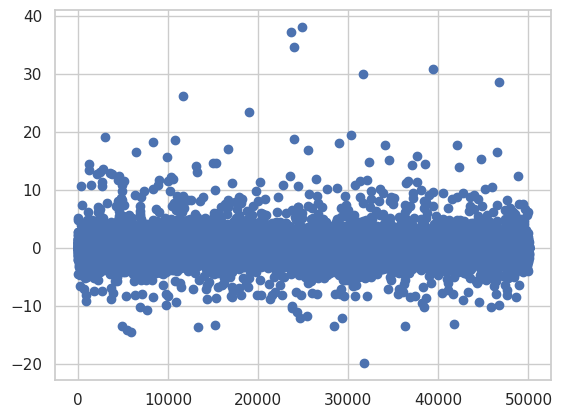

In [54]:
model_results = eval_models()

In [57]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params,rScore
LinearRegression,1.581577,1.551678,1.001378,0.999476,{},0.324842
Ridge,1.581577,1.551678,1.001396,0.999492,{},0.324842
RandomForestRegressor,1.223914,1.261364,0.587989,0.597049,"{'max_depth': 9, 'n_estimators': 45}",0.553848
XGBRegressor,1.246779,1.258283,0.592421,0.598663,"{'learning_rate': 0.01, 'n_estimators': 510}",0.556025


In [59]:
data_df=df[["Fee", "Total Duration (seconds)", "Charging Time (seconds)"]]

In [60]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(data_df, df["GHG Savings (kg)"], random_state=42, test_size=0.20)
size_scaler = preprocessing.StandardScaler().fit(X_train)

In [61]:
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

In [64]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'Ridge': {"model": Ridge(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}

LinearRegression 1.3622827492213618 {}
Ridge 1.3622827493597 {}
RandomForestRegressor 1.0277876102999834 {'max_depth': 9, 'n_estimators': 35}
XGBRegressor 0.869474362900993 {'learning_rate': 0.1, 'n_estimators': 710}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=710, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


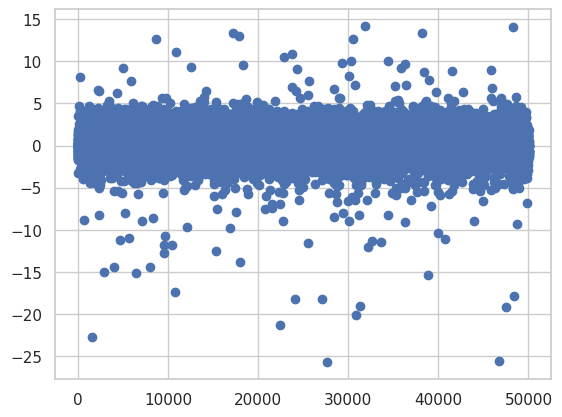

In [65]:
model_results = eval_models()

In [66]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params,rScore
LinearRegression,1.362283,1.372521,0.970207,0.96643,{},0.790652
Ridge,1.362283,1.372521,0.970206,0.966429,{},0.790652
RandomForestRegressor,1.027788,1.060573,0.552701,0.557497,"{'max_depth': 9, 'n_estimators': 35}",0.874999
XGBRegressor,0.869474,1.049333,0.510278,0.551254,"{'learning_rate': 0.1, 'n_estimators': 710}",0.877635
